<a href="https://colab.research.google.com/github/123Erina/UTS_PCD_23423108/blob/main/Jawaban_1dan2_UTSPCD_23423018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

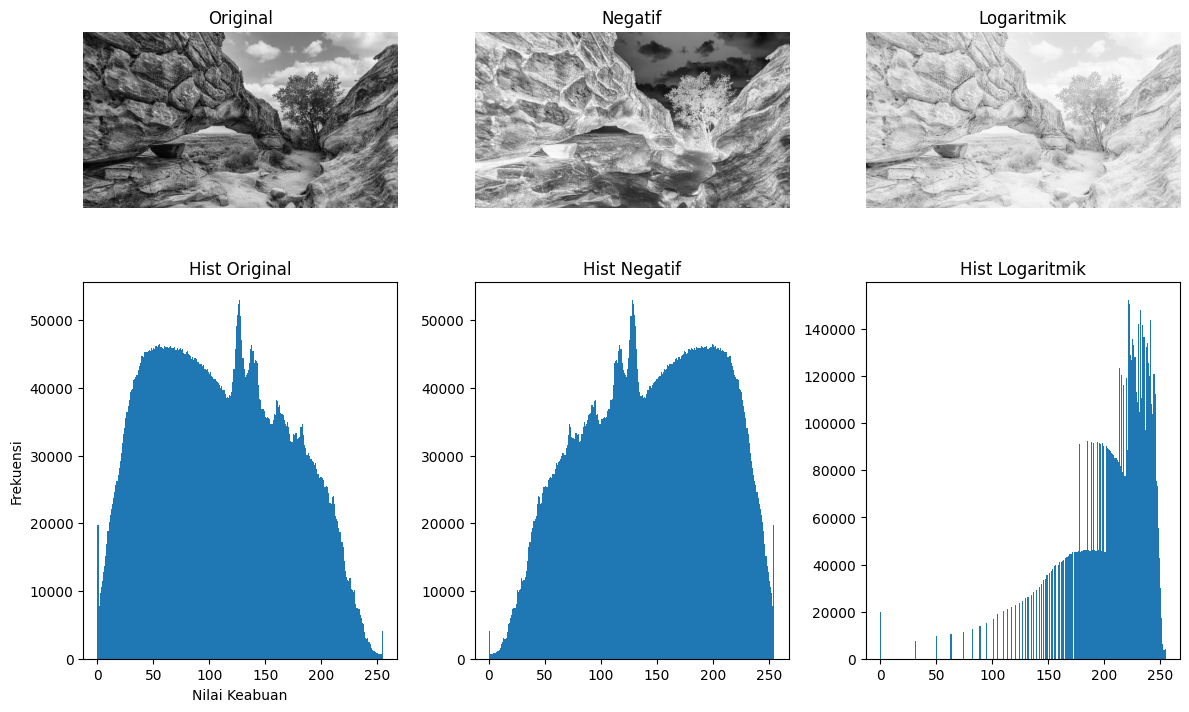

True

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_path = 'image.jpg'

F = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if F is None:
    raise FileNotFoundError(f"File '{img_path}' tidak ditemukan di working dir. Upload terlebih dahulu.")


F = F.astype(np.uint8)

# 1) Negatif: G = 255 - F
neg = 255 - F

# 2) Logaritmik: G = c * log(1 + F), dengan c = 255 / log(1 + max(F))
maxF = float(F.max())
c = 255.0 / np.log(1.0 + maxF)
logim = c * np.log1p(F.astype(np.float32))  # log1p untuk presisi
# Normalisasi & cast ke uint8
logim = np.clip(logim, 0, 255).astype(np.uint8)


fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0,0].imshow(F, cmap='gray', vmin=0, vmax=255); axes[0,0].set_title('Original'); axes[0,0].axis('off')
axes[0,1].imshow(neg, cmap='gray', vmin=0, vmax=255); axes[0,1].set_title('Negatif'); axes[0,1].axis('off')
axes[0,2].imshow(logim, cmap='gray', vmin=0, vmax=255); axes[0,2].set_title('Logaritmik'); axes[0,2].axis('off')

# Histogram masing-masing (0..255)
axes[1,0].hist(F.ravel(), bins=256, range=(0,255)); axes[1,0].set_title('Hist Original'); axes[1,0].set_xlabel('Nilai Keabuan'); axes[1,0].set_ylabel('Frekuensi')
axes[1,1].hist(neg.ravel(), bins=256, range=(0,255)); axes[1,1].set_title('Hist Negatif')
axes[1,2].hist(logim.ravel(), bins=256, range=(0,255)); axes[1,2].set_title('Hist Logaritmik')

plt.tight_layout()
plt.show()


cv2.imwrite('original.png', F)
cv2.imwrite('negative.png', neg)
cv2.imwrite('logarithmic.png', logim)


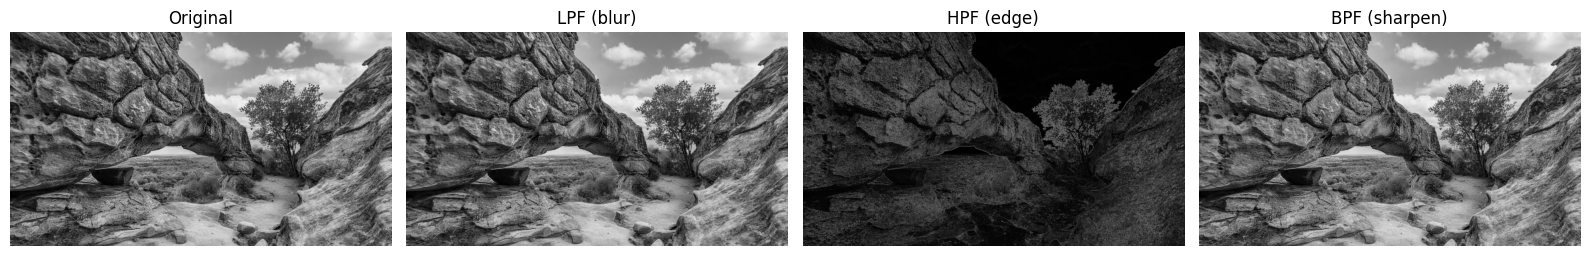

Rata-rata nilai piksel: {'original_mean': 109.74770821277006, 'LPF_mean': 109.74757655767748, 'HPF_mean': 37.05307544849537, 'BPF_mean': 111.25372866030092}


True

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



LPF = (1.0/9.0) * np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=np.float32)
HPF = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype=np.float32)
BPF = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float32)


lpf_img = cv2.filter2D(F, ddepth=-1, kernel=LPF, borderType=cv2.BORDER_REPLICATE)
hpf_img = cv2.filter2D(F, ddepth=-1, kernel=HPF, borderType=cv2.BORDER_REPLICATE)
bpf_img = cv2.filter2D(F, ddepth=-1, kernel=BPF, borderType=cv2.BORDER_REPLICATE)


def to_uint8(img):
    return np.clip(img, 0, 255).astype(np.uint8)

lpf_img = to_uint8(lpf_img)
hpf_img = to_uint8(hpf_img)
bpf_img = to_uint8(bpf_img)


fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(F, cmap='gray', vmin=0, vmax=255); axs[0].set_title('Original'); axs[0].axis('off')
axs[1].imshow(lpf_img, cmap='gray', vmin=0, vmax=255); axs[1].set_title('LPF (blur)'); axs[1].axis('off')
axs[2].imshow(hpf_img, cmap='gray', vmin=0, vmax=255); axs[2].set_title('HPF (edge)'); axs[2].axis('off')
axs[3].imshow(bpf_img, cmap='gray', vmin=0, vmax=255); axs[3].set_title('BPF (sharpen)'); axs[3].axis('off')
plt.tight_layout()
plt.show()


means = {
    'original_mean': float(F.mean()),
    'LPF_mean': float(lpf_img.mean()),
    'HPF_mean': float(hpf_img.mean()),
    'BPF_mean': float(bpf_img.mean())
}
print("Rata-rata nilai piksel:", means)


cv2.imwrite('lpf.png', lpf_img)
cv2.imwrite('hpf.png', hpf_img)
cv2.imwrite('bpf.png', bpf_img)
